### Imports

In [402]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Data Frame

In [413]:
# df = pd.read_csv('../../csv/demand.csv', index_col=0)
# df = df.drop(['2015', '2016', '2017', '2018', '2019', '2020', '2021'], axis=1)
# df = df.reset_index()
# df['index'] = pd.to_datetime(df['index'], format="[%d-%m]")
# df['index'] = df['index'].astype('string')
# df['index'] = df['index'].str.replace('1900', '2022')
# df['2022'] = df['2022'].shift(-1)
# df.rename(columns = {'index':'ds', '2022':'y'}, inplace = True)
# df

In [404]:
demand_data = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
demand_data = demand_data.drop(['Wind Speed', 'Air Temperature', 'Air Temperature(Apparent)', 'Cloud Coverage'] , axis=1)
demand_data = demand_data.reset_index()
demand_data.rename(columns = {'Record Date':'ds', 'Total Demand':'y'}, inplace = True)

In [405]:
demand_data

,ds,y
0,2021-01-01,63342.0
1,2021-01-02,67819.0
2,2021-01-03,67018.0
3,2021-01-04,75574.0
4,2021-01-05,78002.0
...,...,...
1455,2018-12-27,68436.0
1456,2018-12-28,68179.0
1457,2018-12-29,64849.0
1458,2018-12-30,61282.0


### How many days do you want to predict
Input the the variable how much day you would want to input

In [406]:
# Period - How much in the future should the model predict
period = 60

# Split Data Set

"Train set - date interval from 2018/01/01 till 2020/12/31" | 
"Test set - date interval from 2021/01/01 till 2021/12/31"

In [407]:
# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds <= '2021-01-01')]
test_set = demand_data[(demand_data.ds > '2021-01-01')]
# test_set = df[(df.ds >= '2022-01-01')]

#select the period of the test set
test_set = test_set[:period]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])


/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/4185509678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])


# Running the forecast model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.5011
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       2884.13   0.000133143       91.7126   5.696e-07       0.001      125  LS failed, Hessian reset 
      99        2884.8   0.000831799       202.352      0.7284      0.7284      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       2886.48   0.000100994       93.2373   6.794e-07       0.001      288  LS failed, Hessian reset 
     170       2886.61   0.000169593       138.706    1.93e-06       0.001      331  LS failed, Hessian reset 
     199       2886.71   6.54724e-05       58.5808           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       2886.72   6.44294e-05       91.6495    7.99e-07       0.001      463  LS failed, Hessian reset 
     299       2886.81     0.0101525       126.469          10   

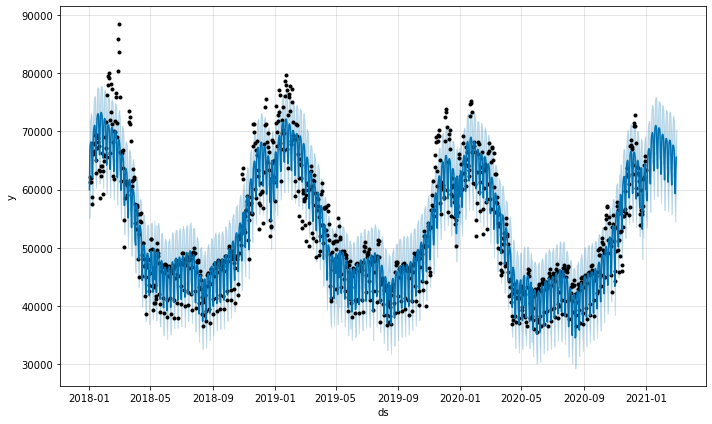

In [408]:
#Facebook prophet model
m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')

#fitting the model
model = m.fit(train_set)

#Create a prediction dataframe
future = m.make_future_dataframe(periods=period,freq='D')

#Create forecast
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

### Prep for metric

In [409]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice 1918,Armistice 1918_lower,Armistice 1918_upper,Armistice 1945,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,55022.321702,55121.470794,64813.955752,55022.321702,55022.321702,0.0,0.0,0.0,0.0,...,-748.063075,-748.063075,-748.063075,9916.753259,9916.753259,9916.753259,0.0,0.0,0.0,59978.941280
1,2018-01-02,55021.598407,62292.427213,71727.346215,55021.598407,55021.598407,0.0,0.0,0.0,0.0,...,1836.233103,1836.233103,1836.233103,10216.967334,10216.967334,10216.967334,0.0,0.0,0.0,67074.798844
2,2018-01-03,55020.875112,62874.831192,72317.014401,55020.875112,55020.875112,0.0,0.0,0.0,0.0,...,2268.840887,2268.840887,2268.840887,10550.452493,10550.452493,10550.452493,0.0,0.0,0.0,67840.168492
3,2018-01-04,55020.151817,63413.068328,73166.710590,55020.151817,55020.151817,0.0,0.0,0.0,0.0,...,2261.045816,2261.045816,2261.045816,10912.469997,10912.469997,10912.469997,0.0,0.0,0.0,68193.667630
4,2018-01-05,55019.428523,63038.717801,72732.621357,55019.428523,55019.428523,0.0,0.0,0.0,0.0,...,1731.252895,1731.252895,1731.252895,11297.728139,11297.728139,11297.728139,0.0,0.0,0.0,68048.409556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2021-02-26,53083.141154,61688.823018,71460.267354,52944.389362,53205.769680,0.0,0.0,0.0,0.0,...,1731.252895,1731.252895,1731.252895,11825.554030,11825.554030,11825.554030,0.0,0.0,0.0,66639.948079
1152,2021-02-27,53093.898857,57602.992695,67032.718452,52952.114852,53220.767143,0.0,0.0,0.0,0.0,...,-2289.596675,-2289.596675,-2289.596675,11550.152739,11550.152739,11550.152739,0.0,0.0,0.0,62354.454921
1153,2021-02-28,53104.656560,54487.121444,63974.854868,52959.806123,53236.198315,0.0,0.0,0.0,0.0,...,-5059.712950,-5059.712950,-5059.712950,11251.751564,11251.751564,11251.751564,0.0,0.0,0.0,59296.695173
1154,2021-03-01,53115.414263,58728.443519,68297.848808,52966.925193,53254.011134,0.0,0.0,0.0,0.0,...,-748.063075,-748.063075,-748.063075,10932.405257,10932.405257,10932.405257,0.0,0.0,0.0,63299.756445


In [410]:
#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

# Final Model

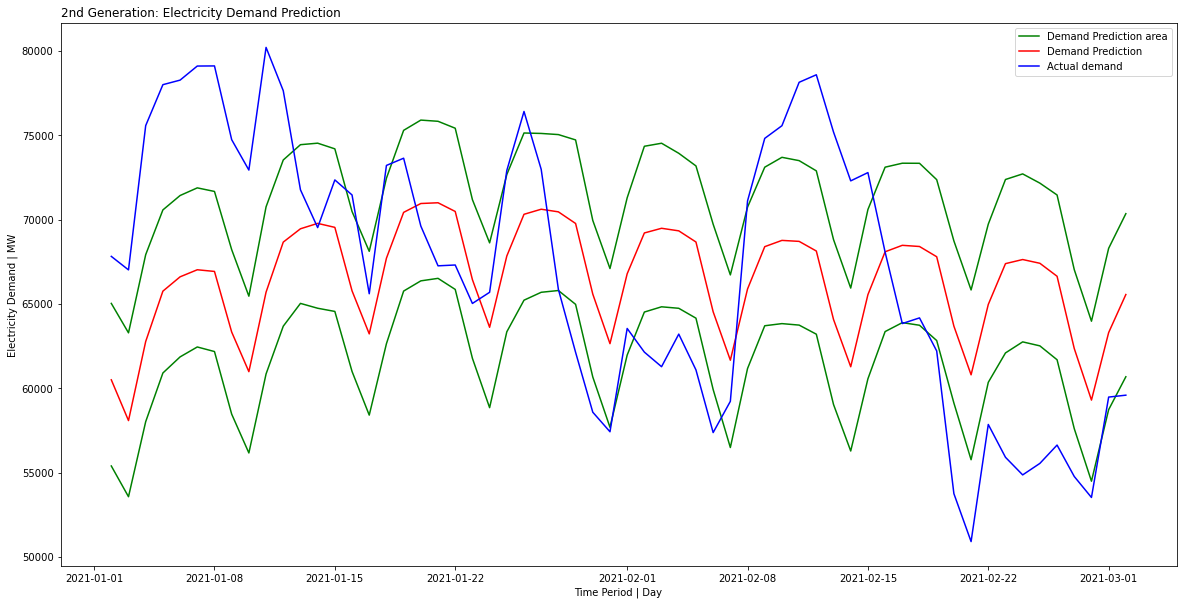

Model MAE:
6937.3886431708615


In [411]:
plt.figure(figsize=(20, 10))
plt.title("2nd Generation: Electricity Demand Prediction ", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

In [412]:
# # Splitting Dataset Into Train Set And Test Set
# train_set = demand_data[(demand_data.ds < '2021-01-01')]
# train_set = demand_data[(demand_data.ds >= '2020-01-01')]
# test_set = demand_data[(demand_data.ds >= '2021-01-01')]

# # Convert to Date Time
# train_set['ds'] = pd.to_datetime(train_set['ds'])
# test_set['ds'] = pd.to_datetime(test_set['ds'])

# #select the period of the test set
# test_set = test_set[:period]

# m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
# m.add_country_holidays(country_name='France')
# model = m.fit(train_set)
# future = m.make_future_dataframe(periods=period,freq='D')
# forecast = m.predict(future)

# #Data visualization from the official source
# figure_forecast = m.plot(forecast)

# #Prep for MEA
# y_pred = forecast['yhat'][-period:]
# y_org = test_set['y']

# train_set_pred = forecast[(forecast.ds < '2021-01-01')]



# plt.figure(figsize=(20, 10))
# plt.title("2nd Generation: Electricity Demand Prediction | Winter", loc = 'left')

# plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
# plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
# plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

# plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

# plt.ylabel("Electricity Demand | MW")
# plt.xlabel("Time Period | Day")

# plt.legend()
# plt.show() 

# print('Model MAE:')
# print(mean_absolute_error(y_org, y_pred))